# Visualizing FordGoBike Data
## (2017)

## Table of Contents
    Introduction

    Preliminary Wrangling

    Univariate Exploration

    Bivariate Explorationn

    Multivariate Exploration

    Summary

    Sources

In [1]:
from IPython.display import Image 
Image(url = 'https://c1cleantechnicacom-wpengine.netdna-ssl.com/files/2016/10/Ford-GoBike_MTVweb.jpg')

# Introduction
      Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the         region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will         grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

# Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

import datetime

**Loading in the dataset**

In [3]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')

In [4]:
# Showing the first five rows of the newly combined dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [5]:
# Sampling the data helps the analyst understand the required cleaning needed, and get a feel for the data
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
148603,1972,2017-11-09 23:13:00.7120,2017-11-09 23:45:53.3250,309,San Jose City Hall,37.337391,-121.886995,208,S. 4th St at San Carlos St,37.332836,-121.883912,1606,Subscriber
261192,621,2017-10-09 16:11:18.1890,2017-10-09 16:21:39.9740,23,The Embarcadero at Steuart St,37.791464,-122.391034,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2559,Subscriber
304873,582,2017-09-27 08:24:25.5970,2017-09-27 08:34:08.4210,213,32nd St at Adeline St,37.823847,-122.281193,230,14th St at Mandela Pkwy,37.810743,-122.291415,2740,Subscriber
201099,768,2017-10-26 12:47:16.3200,2017-10-26 13:00:04.8560,181,Grand Ave at Webster St,37.811377,-122.265192,194,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,673,Subscriber
432898,599,2017-08-17 09:23:57.2470,2017-08-17 09:33:56.4100,64,5th St at Brannan St,37.776754,-122.399018,19,Post St at Kearny St,37.788975,-122.403452,898,Subscriber
233775,458,2017-10-17 17:08:34.5270,2017-10-17 17:16:13.3340,45,5th St at Howard St,37.781752,-122.405127,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2946,Subscriber
228365,368,2017-10-19 07:22:16.1910,2017-10-19 07:28:24.3870,200,2nd Ave at E 18th St,37.800214,-122.253810,163,Lake Merritt BART Station,37.797320,-122.265320,1555,Subscriber
455578,559,2017-08-08 14:41:55.4250,2017-08-08 14:51:14.4420,81,Berry St at 4th St,37.775880,-122.393170,62,Victoria Manalo Draves Park,37.777791,-122.406432,2377,Subscriber
143817,657,2017-11-11 14:09:37.0310,2017-11-11 14:20:34.8090,18,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,249,Russell St at College Ave,37.858473,-122.253253,109,Subscriber
260051,295,2017-10-09 19:12:19.9340,2017-10-09 19:17:15.4930,79,7th St at Brannan St,37.773492,-122.403673,102,Irwin St at 8th St,37.766883,-122.399579,2545,Subscriber


In [6]:
# Let's take a peak into the data's basic information
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [7]:
df.shape

(519700, 13)

In [8]:
# Any duplicates?
df.duplicated().sum()
# No duplicates here - that was straightforward

0

In [9]:
 What about NaN values?
df.isna().sum()
# It looks no null object

Object `values` not found.


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

# Cleaning
    we need to clean our data like:-
          .Starting and ending times to the timestamp format
          .Bike ID, start station ID, and end station ID to object format
          .User type to category format

In [10]:
#making the copy of data so the original data remains unchanged
df_cleaned=df.copy()

In [11]:
# Changing the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)


In [12]:
# User type to category format
df_cleaned['user_type ']=df_cleaned.user_type.astype('category')

In [13]:
#Bike ID, start station ID, and end station ID to object format
df_cleaned['bike_id ']=df_cleaned.bike_id.astype(str)
df_cleaned['start_station_id  ']=df_cleaned.start_station_id .astype(str)
df_cleaned['end_station_id ']=df_cleaned.end_station_id.astype(str)

# Test

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
user_type                  519700 non-null category
bike_id                    519700 non-null object
start_station_id           519700 non-null object
end_station_id             519700 non-null object
dtypes: category(1), 

## Define
    
   **Add columns for the start month, day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable units**


In [15]:
# Start time month (January - December)
df_cleaned['start_time_month'] = df_cleaned['start_time'].dt.strftime('%B')

In [16]:
# Start time month (1-12)
df_cleaned['start_time_month_num'] = df_cleaned['start_time'].dt.month.astype(int)

In [17]:
# Start time weekday
df_cleaned['start_time_weekday'] = df_cleaned['start_time'].dt.strftime('%a')

In [18]:
# Start and end time hour
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour
df_cleaned['end_time_hour'] = df_cleaned['end_time'].dt.hour

In [19]:
# Duration in seconds to duration in minutes
df_cleaned['duration_min'] = df_cleaned['duration_sec']/60
df_cleaned['duration_min'] = df_cleaned['duration_min'].astype(int)

## Test

In [20]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_id,start_station_id,end_station_id,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Customer,96,74,43,December,12,Sun,16,15,1335
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Customer,88,284,96,December,12,Sun,15,13,1313
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,Customer,1094,245,245,December,12,Sun,22,11,762
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,...,Customer,2831,60,5,December,12,Sun,17,10,1036
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,Subscriber,3167,239,247,December,12,Sun,14,2,726


In [22]:
df_cleaned.info(null_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 23 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
user_type                  519700 non-null category
bike_id                    519700 non-null object
start_station_id           519700 non-null object
end_station_id             519700 non-null object
start_time_month     

## Define:  
  
    Calculate the total distance traveled using the latitude and longitude in the data set¶

**Calculations are derived from the 'haversine' formula which is used to calculate the great-circle distance between tow points, i.e. the shortest distance over the earth's surface.** 

In [23]:
import math
from math import radians, sin, cos, acos

def distance(origin,destination):
    lat1,long1=origin
    lat2,long2=destination
    radius=6371
     # this is in kilometers - will convert to US units of miles after
    
    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
    

In [24]:
# Using the calcuated math on our columns for lat and long
df_cleaned['distance_km'] = df_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [25]:
# Converting the kilometers to miles
df_cleaned['distance_miles'] = df_cleaned['distance_km'] * 0.621371

In [26]:

df_cleaned.sample(5)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_station_id,end_station_id,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles
114277,1446,2017-11-21 08:30:05.584,2017-11-21 08:54:11.898,130,22nd St Caltrain Station,37.757369,-122.392057,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,...,130,20,November,11,Tue,8,8,24,3.822711,2.375322
236109,200,2017-10-17 07:50:17.689,2017-10-17 07:53:38.630,25,Howard St at 2nd St,37.787522,-122.397405,45,5th St at Howard St,37.781752,...,25,45,October,10,Tue,7,7,3,0.933878,0.580285
144051,1581,2017-11-11 12:56:10.845,2017-11-11 13:22:32.231,13,Commercial St at Montgomery St,37.794231,-122.402923,74,Laguna St at Hayes St,37.776435,...,13,74,November,11,Sat,12,13,26,2.848851,1.770193
440265,925,2017-08-14 17:48:13.233,2017-08-14 18:03:38.585,66,3rd St at Townsend St,37.778742,-122.392741,42,San Francisco City Hall (Polk St at Grove St),37.778650,...,66,42,August,8,Mon,17,18,15,2.240179,1.391982
411587,274,2017-08-24 17:50:01.706,2017-08-24 17:54:35.909,312,San Jose Diridon Station,37.329732,-121.901782,277,Morrison Ave at Julian St,37.333658,...,312,277,August,8,Thu,17,17,4,0.743259,0.461839


**Save the cleaned data set to a new file**


In [27]:
df_cleaned.to_csv('fordgo_master_clean.csv', index = False)


## What is the structure of your dataset?

The column header descriptions are as follows:

      Trip Duration:-
            .Start Time and Date

            .End Time and Date

      Start Station ID:-
            .Start Station Name
           
           .Start Station Latitude

           .Start Station Longitude

      End Station ID:-

           .End Station Name

           .End Station Latitude

          .End Station Longitude

          .Bike ID
      
      .User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

I added the following columns in my cleaning efforts:

        .Start Time Month
        
        .Start Time Month Number

        .Start Time Day of the Week
        
        .Start Time Hour


## What are the main feature(s) of interest in your dataset?

The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand. There is also ample data related to the users of the bike service including whether they are a paying member or a casual user.

# Univariate Exploration

In [31]:

# Before we visualize our data, let's see what kind of numbers we're looking at
df_cleaned.start_time_month.describe()

count      519700
unique          7
top       October
freq       108937
Name: start_time_month, dtype: object

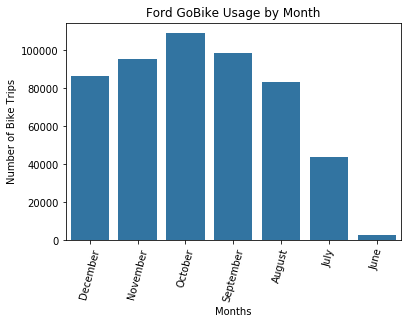

In [32]:
# Monthly usage of the Ford Go Bike system

base_color=sb.color_palette()[0]

sb.countplot(data=df_cleaned,x='start_time_month',color =base_color);
plt.xlabel("Months")
plt.ylabel("Number of Bike Trips")
plt.title('Ford GoBike Usage by Month')
plt.xticks(rotation=75);


**observation**
    October is the most popular month, with september as the second most popular, and November as the third most popular months to use the bike system.
    
  surprisingly, the winter months are the most popular times to use the Ford Go Bike sharing system in 2017.

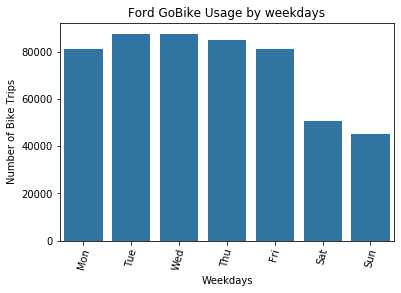

In [33]:
## Weekday usage of the Ford Go bike system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color=sb.color_palette()[0]

sb.countplot(data=df_cleaned,x='start_time_weekday',color =base_color,order=weekday);
plt.xlabel("Weekdays")
plt.ylabel("Number of Bike Trips")
plt.title('Ford GoBike Usage by weekdays')
plt.xticks(rotation=75);


**Observation2:-**
Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers. The usage drops significantly on Saturdays and Sundays 

**Suggestion**:-
Ford bike share system is used during working days

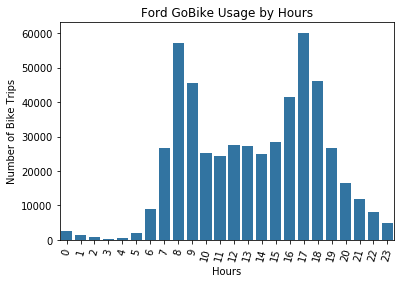

In [34]:
# Hourly usage of the Ford Go Bike System
base_color=sb.color_palette()[0]

sb.countplot(data=df_cleaned,x='start_time_hour',color =base_color);
plt.xlabel("Hours")
plt.ylabel("Number of Bike Trips")
plt.title('Ford GoBike Usage by Hours')
plt.xticks(rotation=75);


**Observation3**

The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm.

In [35]:
df_cleaned.distance_miles.describe()

count    519700.000000
mean          0.986163
std           0.627828
min           0.000000
25%           0.559012
50%           0.870071
75%           1.287788
max          42.369292
Name: distance_miles, dtype: float64

In [44]:
df_cleaned.distance_miles.mean()

0.9861634901419503

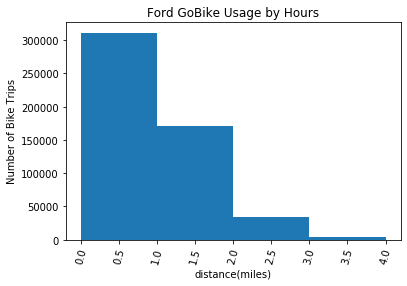

In [43]:
base_color=sb.color_palette()[0]
bins_edge=np.arange(0,5,1)

plt.hist(data=df_cleaned,x='distance_miles',color =base_color,bins=bins_edge);
plt.xlabel("distance(miles)")
plt.ylabel("Number of Bike Trips")
plt.title('Ford GoBike Usage by Hours')
plt.xticks(rotation=75);

**observation4**

The mean distance traveled is 0.98 miles, with 75% of rides being 1.28 miles or less. Looking at the histogram above a majority of the rides fall under 2 miles.

# Bivariate Exploration

In [45]:
# Customers vs Subscribers
customer=df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_cleaned['bike_id'].count()
subscriber_prop = subscriber / df_cleaned['bike_id'].count()


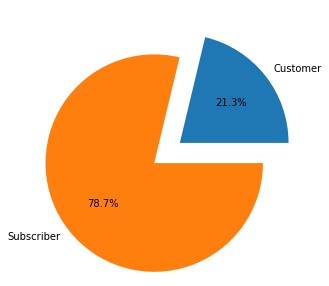

In [48]:
#pie chart Customers vs Subscribers
plt.figure(figsize = [8, 5])
labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)
plt.pie(size, explode=explode, labels = labels,autopct='%1.1f%%');

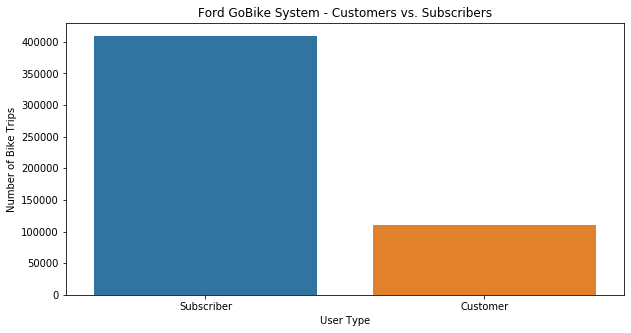

In [51]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

sb.countplot(data = df_cleaned, x = "user_type",order=df_cleaned.user_type.value_counts().index);
plt.xlabel('User Type');
plt.ylabel('Number of Bike Trips');
plt.title('Ford GoBike System - Customers vs. Subscribers');

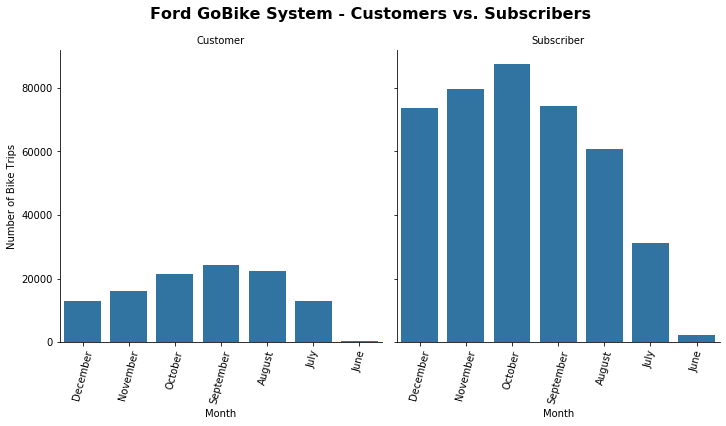

In [60]:
#plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", kind='count', sharey = True, color = base_color);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

**Observation**
 
 Winter months are the good for the bike sharing system for both groups what can be determined by the harsher weather.¶

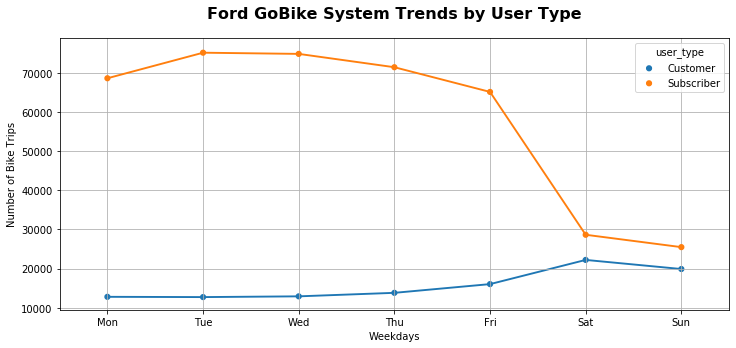

In [61]:
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

**observation**

 The point plot above is an excellent visual showing the sharp contrast between Customers and Subscribers

## Were there any interesting or surprising interactions between features?

Nothing out of the expected here


## Summary
This project is a win - win situation where a large number of people can benefit from this program:

Environmentally friendly, budget friendly, and lifetsyle friendly.
Subscribers (i.e. daily commuters) benefit from a health commuting choice
Customers (i.e. tourists, students, etc.) have a sustainable, yet flexible option for touring the city.
Affordable and convenient transportation for the people of all socioeconomic classes

## Sources

.[FordGoBike Data Set](https://s3.amazonaws.com/baywheels-data/index.html)

.[Haversine formula](https://www.movable-type.co.uk/scripts/latlong.html) used to calculate distances using latitude and longitude

.[Matplotlib](https://matplotlib.org/) histogram documentation